In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import pandas as pd
from scipy.spatial.distance import mahalanobis, cosine
from scipy.linalg import inv
import os
from sklearn.manifold import TSNE  # Import TSNE from sklearn

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="n_jobs value .* overridden to 1 by setting random_state")

# Load the data from the pickle file
file_path = '/Users/caizhebiao/Course/semester1/Deep Learning/R2_tSNE & UMAP/Data/large_cap_x_data.pickle'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Describe the data
print(f"Type of data: {type(data)}")

print(f"Number of keys (timestamps): {len(data)}")

# Show the first few keys (timestamps)
print("\nFirst 5 timestamps:")
timestamps = list(data.keys())  # e.g., [Timestamp('2000-12-31'), Timestamp('2001-01-31'), ...]
print(timestamps[:5])

# Inspect the structure of the values corresponding to the first timestamp
first_timestamp = list(data.keys())[0]
print(f"\nData type for the first timestamp ({first_timestamp}): {type(data[first_timestamp])}")

# Print the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(data[first_timestamp].head())
# Sort the index of the DataFrame
data[first_timestamp].sort_index(inplace=True)
print(data[first_timestamp].columns)

# Print the dimensions of the dataset
print(f"Dataset dimensions: {data[first_timestamp].shape}")


Type of data: <class 'dict'>
Number of keys (timestamps): 263

First 5 timestamps:
[Timestamp('2000-12-31 00:00:00'), Timestamp('2001-01-31 00:00:00'), Timestamp('2001-02-28 00:00:00'), Timestamp('2001-03-31 00:00:00'), Timestamp('2001-04-30 00:00:00')]

Data type for the first timestamp (2000-12-31 00:00:00): <class 'pandas.core.frame.DataFrame'>

First few rows of the DataFrame:
       return__1y return__2y return__3y information_ratio_geo_1y  \
as_of                                                              
B14289   0.060557   0.089329   0.105613                  1.48421   
B24194   0.158892   0.137095   0.092367                  1.82151   
B00356    0.19123   0.396596    0.38117                  1.32031   
B15503  -0.115709   0.052764   0.159084                  -0.2371   
B08426   0.017042   0.222839   0.266609                  0.28514   

       information_ratio_geo_2y information_ratio_geo_3y batting_average_1y  \
as_of                                                       

In [2]:
# Step 1: Identify common stocks across all timestamps
# Get the index (stock codes) for each DataFrame
common_stocks = set(data[list(data.keys())[0]].index)  # Start with stocks from the first timestamp

# Find the intersection of stock codes across all timestamps
for timestamp in data.keys():
    common_stocks = common_stocks.intersection(data[timestamp].index)

# Convert the common stocks back to a list for later use
common_stocks = list(common_stocks)

# Sort the list of common stocks
common_stocks.sort()

print(f"Common stocks across all timestamps: {common_stocks}")
print(f"Number of common stocks: {len(common_stocks)}")

Common stocks across all timestamps: ['B00350', 'B00356', 'B01766', 'B02476', 'B02738', 'B02857', 'B02943', 'B03142', 'B03193', 'B03358', 'B03634', 'B03669', 'B03745', 'B04687', 'B04731', 'B05551', 'B06639', 'B07143', 'B07747', 'B07780', 'B07785', 'B08335', 'B08341', 'B08358', 'B08363', 'B08368', 'B08376', 'B08378', 'B08415', 'B08417', 'B08470', 'B08500', 'B10567', 'B11472', 'B11655', 'B11819', 'B11985', 'B12284', 'B14112', 'B14940', 'B16591', 'B16800', 'B16812', 'B16922', 'B17783', 'B18804', 'B19389', 'B21549', 'B21601', 'B21699', 'B21791', 'B21801', 'B21954', 'B22187', 'B22229', 'B22233', 'B22272', 'B22455', 'B23896', 'B23977', 'B24174', 'B24186']
Number of common stocks: 62


In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.linalg import orthogonal_procrustes

previous_embedding = None  # Initialize with no previous embedding for the first run

# Directory to save the t-SNE results
output_directory = '/Users/caizhebiao/Course/semester1/Deep Learning/R2_tSNE & UMAP/20241101/Ortho_transformed_tSNE_results'
os.makedirs(output_directory, exist_ok=True)  # Ensure the output directory exists

# Step 1: Iterate over all timestamps, apply t-SNE, and save the embeddings
for timestamp in data.keys():
    df = data[timestamp]

    # Step 2: Filter the DataFrame to include only common stocks
    df_filtered = df.loc[common_stocks]

    # Step 3: Convert all columns to numeric, forcing errors to NaN
    df_numeric = df_filtered.apply(pd.to_numeric, errors='coerce').dropna()

    # Step 4: Initialize the t-SNE model
    timestamp_str = str(timestamp.date())  # Convert timestamp to string for filenames
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

    # Step 5: Fit t-SNE on the numeric data
    embedding = tsne_model.fit_transform(df_numeric)

    # Step 6: Apply Orthogonal Procrustes to align with previous embedding, if available
    if previous_embedding is not None:
        # Align current embedding with previous embedding
        matrix, _ = orthogonal_procrustes(previous_embedding, embedding)
        embedding = embedding @ matrix

    # Save the final aligned embedding
    np.save(f'{output_directory}/final_embedding_{timestamp_str}.npy', embedding)

    # Update the previous embedding for the next iteration
    previous_embedding = embedding


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1

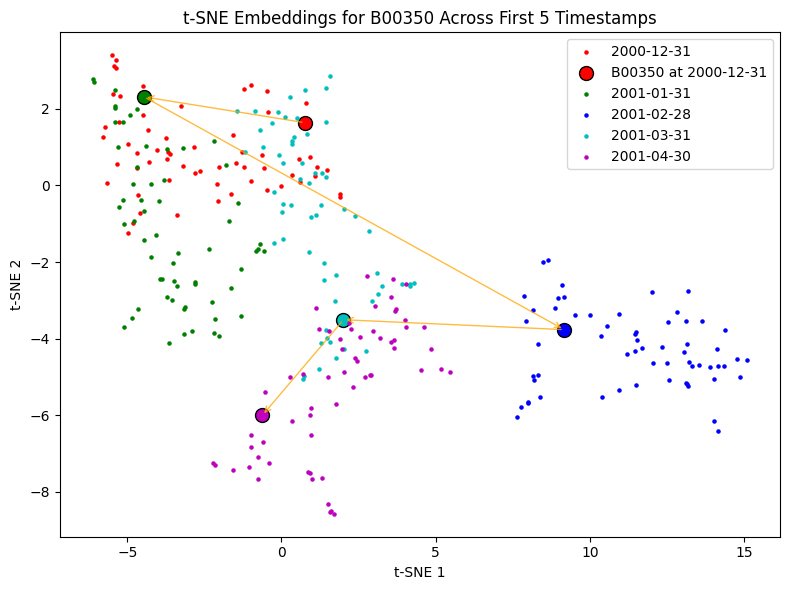

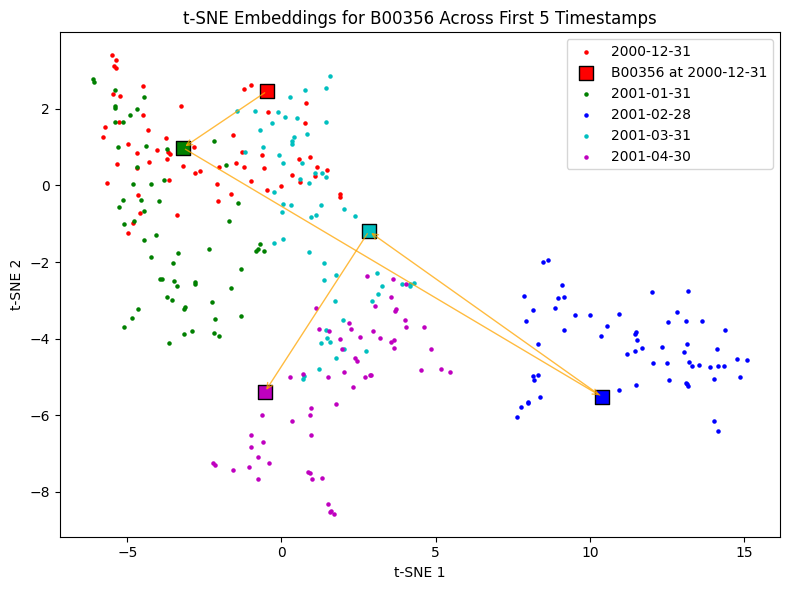

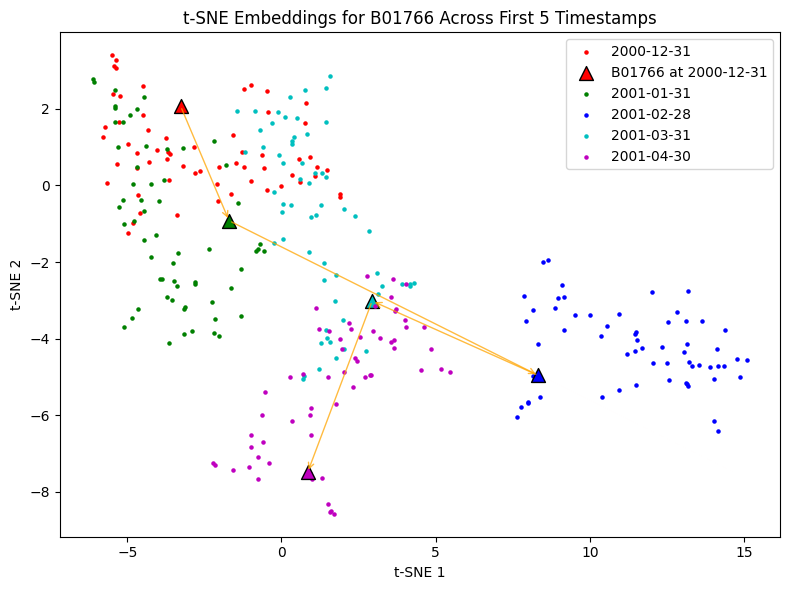

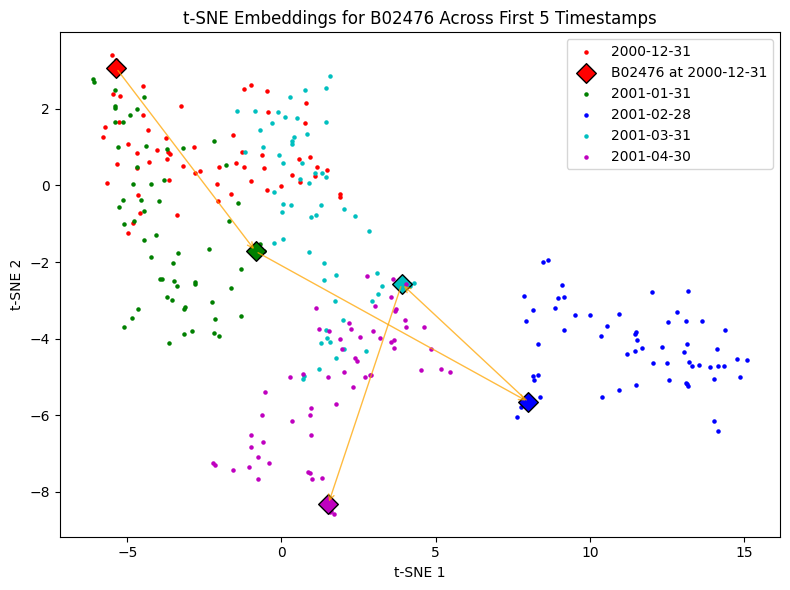

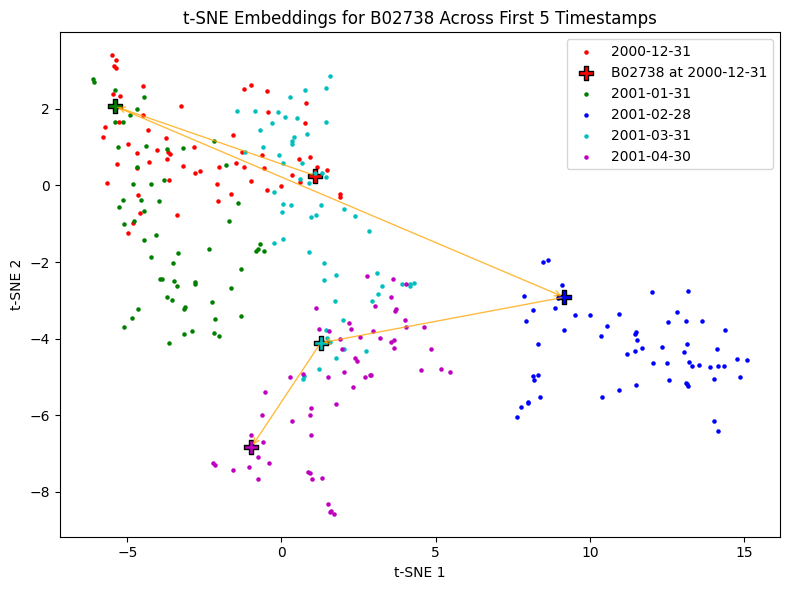

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Step 7: Plot the first five final embeddings
# Define the first five timestamps
timestamps_to_plot = list(data.keys())[:5]

# Set up colors for differentiation (one color per timestamp)
colors = ['r', 'g', 'b', 'c', 'm']

# Define different marker symbols for the five stocks to track
stock_markers = ['o', 's', '^', 'D', 'P']  # Circle, Square, Triangle, Diamond, Pentagon

# Track the axis change for the first five common stocks
stocks_to_check = common_stocks[:5]

# Iterate over each stock to create separate plots
for j, stock in enumerate(stocks_to_check):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Store positions for connecting lines
    stock_positions = []

    # Iterate over timestamps and plot embeddings
    for i, timestamp in enumerate(timestamps_to_plot):
        timestamp_str = str(timestamp.date())
        
        # Load the final embedding from the saved file
        embedding = np.load(f'{output_directory}/final_embedding_{timestamp_str}.npy')
        
        # Filter the DataFrame to include only common stocks for consistency
        df = data[timestamp]
        df_filtered = df.loc[common_stocks]
        
        # Plot the overall embedding for the current timestamp in a specific color
        ax.scatter(embedding[:, 0], embedding[:, 1], s=5, c=colors[i], label=f'{timestamp_str}')
        
        # Highlight and track the positions of the selected stock
        if stock in df_filtered.index:
            stock_index = df_filtered.index.get_loc(stock)
            
            # Plot this specific stock using a different marker
            ax.scatter(
                embedding[stock_index, 0], embedding[stock_index, 1],
                s=100, c=colors[i], marker=stock_markers[j], edgecolor='black',
                label=f'{stock} at {timestamp_str}' if i == 0 else ""
            )
            
            # Save the position to draw the connecting line with arrows later
            stock_positions.append((embedding[stock_index, 0], embedding[stock_index, 1]))
    
    # Draw connecting lines with arrows for the selected stock across timestamps
    for k in range(len(stock_positions) - 1):
        # Define start and end points for the arrow
        start_pos = stock_positions[k]
        end_pos = stock_positions[k + 1]
        
        # Create an arrow from start_pos to end_pos
        arrow = FancyArrowPatch(
            posA=start_pos, posB=end_pos, color='orange', arrowstyle='->', mutation_scale=10, alpha=0.75
        )
        ax.add_patch(arrow)
    
    # Add title and labels
    ax.set_title(f't-SNE Embeddings for {stock} Across First 5 Timestamps')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.legend(loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [9]:
from scipy.spatial.distance import mahalanobis, cosine
from scipy.linalg import inv
import numpy as np

def calculate_S_single_fund(high_dim_t, high_dim_t_1, low_dim_t, low_dim_t_1, High_diff, Low_diff, distance_type='mahalanobis'):
    """
    Calculate the S metric for a single fund between two timestamps.
    
    Parameters:
    - high_dim_t: High-dimensional data at current timestamp for one fund (1D array)
    - high_dim_t_1: High-dimensional data at previous timestamp for the same fund (1D array)
    - low_dim_t: Low-dimensional embedding at current timestamp for one fund (1D array of shape [2])
    - low_dim_t_1: Low-dimensional embedding at previous timestamp for the same fund (1D array of shape [2])
    - distance_type: 'mahalanobis' or 'cosine' (specifies the high-dimensional distance metric)
    - High_diff: List to store the high-dimensional distance differences
    - Low_diff: List to store the low-dimensional distance differences
    """
    # Calculate high-dimensional distance based on the selected metric
    if distance_type == 'mahalanobis':
        # Find indices of features with variance > 0
        non_zero_variance_indices = np.where(high_dim_t != high_dim_t_1)[0]
        high_dim_t_reduced = high_dim_t[non_zero_variance_indices]
        high_dim_t_1_reduced = high_dim_t_1[non_zero_variance_indices]
        
        # Calculate the covariance matrix and its inverse
        cov_matrix = np.cov(np.vstack([high_dim_t_reduced, high_dim_t_1_reduced]).T)
        cov_inv = inv(cov_matrix) if cov_matrix.size > 1 else np.eye(len(high_dim_t_reduced))  # Handle singular case
        D_H = mahalanobis(high_dim_t_reduced, high_dim_t_1_reduced, cov_inv)
    elif distance_type == 'cosine':
        D_H = cosine(high_dim_t, high_dim_t_1)
    else:
        raise ValueError("Invalid distance type. Choose 'mahalanobis' or 'cosine'.")

    # Low-dimensional distance using Euclidean distance (L2 norm)
    D_L = np.linalg.norm(low_dim_t - low_dim_t_1)

    # Append results to the provided lists
    High_diff.append(D_H)
    Low_diff.append(D_L)

In [10]:
# Distance metric selection
distance_type = 'cosine'  # Set to 'cosine' or 'mahalanobis' as needed
 
S_list = []  # List to store S values for all funds

for fund in common_stocks:
    
    # Initialize previous data as None for the first iteration
    previous_high_dim_data = None
    previous_low_dim_embedding = None

    # Lists to store distance differences
    High_diff = []
    Low_diff = []

    # Iterate through the first five timestamps
    for timestamp in timestamps[:5]:
        timestamp_str = str(timestamp.date())

        # Filter the DataFrame to include only common stocks for consistency
        df = data[timestamp]
        df_filtered = df.loc[common_stocks]
        
        # Retrieve high-dimensional data for the current timestamp for the specific fund
        high_dim_data_t = np.array(df_filtered.loc[fund].values)
        
        # Load low-dimensional embedding for the current timestamp
        low_dim_embedding = np.load(os.path.join(output_directory, f'final_embedding_{timestamp_str}.npy'))
        
        # Locate the index of the fund in the low-dimensional embedding
        fund_index = df_filtered.index.get_loc(fund)
        low_dim_data_t = low_dim_embedding[fund_index]
        
        # Calculate S for the current fund if previous data is available
        if previous_high_dim_data is not None and previous_low_dim_embedding is not None:
            calculate_S_single_fund(
                high_dim_t=high_dim_data_t,
                high_dim_t_1=previous_high_dim_data,
                low_dim_t=low_dim_data_t,
                low_dim_t_1=previous_low_dim_embedding,
                High_diff=High_diff,
                Low_diff=Low_diff,
                distance_type=distance_type
            )         
        
        # Update previous data for the next iteration
        previous_high_dim_data = high_dim_data_t
        previous_low_dim_embedding = low_dim_data_t

    # Calculate the S metric as the correlation between high and low-dimensional distances
    S = np.corrcoef(High_diff, Low_diff)[0, 1]
    
    # Output specific S values for stocks of interest
    if fund in stocks_to_check:
        print(High_diff)
        print(Low_diff)
        print(f"S for {fund}:", S)

    # Store the S value for the specific fund
    S_list.append(S)

[np.float64(0.007079389722210783), np.float64(0.03713518666017068), np.float64(0.06843857760705796), np.float64(0.024683695378605597)]
[np.float32(5.25352), np.float32(14.913006), np.float32(7.1578), np.float32(3.6312094)]
S for B00350: 0.2777558623908307
[np.float64(0.0029204566384067876), np.float64(0.06756808366933476), np.float64(0.057257719003778296), np.float64(0.07275801311150187)]
[np.float32(3.0989347), np.float32(15.063099), np.float32(8.7083), np.float32(5.3937793)]
S for B00356: 0.5996596904569588
[np.float64(0.09983200014296345), np.float64(0.04354813215268594), np.float64(0.1735203231549164), np.float64(0.0813871270018518)]
[np.float32(3.3771753), np.float32(10.815517), np.float32(5.731298), np.float32(4.941987)]
S for B01766: -0.5144223399021828
[np.float64(0.0997106756995404), np.float64(0.07855247211536798), np.float64(0.23622512760748704), np.float64(0.06296757659705399)]
[np.float32(6.5808353), np.float32(9.676258), np.float32(5.1307006), np.float32(6.2252035)]
S for

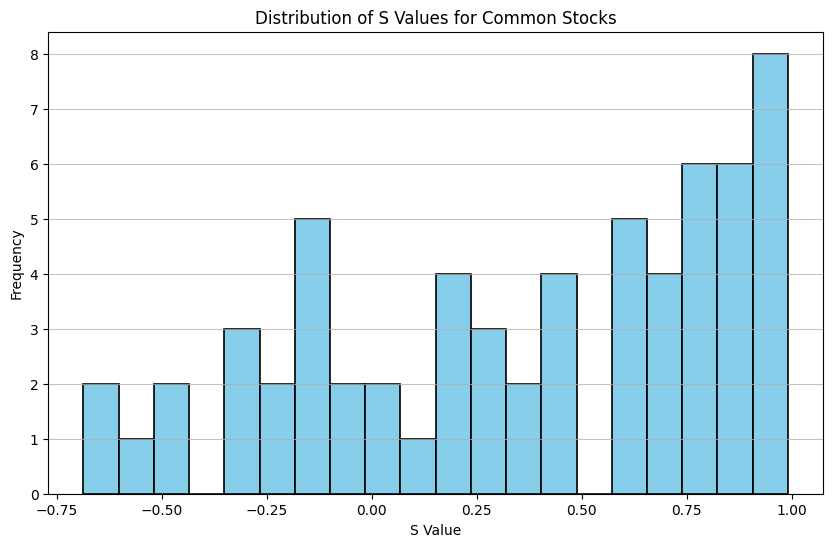

In [11]:
# Plot the distribution of S values
plt.figure(figsize=(10, 6))
plt.hist(S_list, bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Distribution of S Values for Common Stocks')
plt.xlabel('S Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Steps This Week

1. **Standardizing Fund Selection**:  
   I made several updates for greater standardization. Now, I consistently select the same set of top five funds within the "Common Stock" category, sorted by a specified criterion. This selection serves as the basis for all operations, such as indexing and tracking, to maintain consistency across analyses.

2. **Validation Process**:  
   This week’s main focus was validation. I applied an alternative method for visual representation and refined the approach to confirm the reliability of these standardized operations.

3. **High and Low Dimension Comparison Metric**:  
   For comparing high-dimensional and low-dimensional representations, I propose using **correlation** as a key metric. Specifically, I measure the difference in distances between high and low dimensions. The low dimension uses the **L2 norm** for distance measurement, while in the high dimension, **cosine similarity** is applied. This approach is based on Ali Hirsa's framework, where cosine similarity has shown theoretical backing.

4. **Interpretation of Correlation**:  
   One important consideration is the interpretation of correlation between these metrics. Since cosine similarity measures similarity (shared characteristics) and the low-dimensional metric measures distance (difference), a higher negative correlation indicates better alignment. This negative correlation reflects that as similarity increases, the distance should ideally decrease, and thus, achieving a larger negative correlation would be optimal.